# Membres du groupe :
* Hajji Bilal
* Hamdani Youssef
* Oulkhir Ismail

# Projet Optimisation Stochastique

Le projet consiste en choisir une fonction compliqué à optimiser, en utilisant les algorithmes d'optimisation stochastique comme celle vu en cours (Recuit simulé). et de mettre en oeuvre une analyse de ces différents algorithmes.

In [39]:
pip install scikit-optimize deap

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import numpy as np
import numpy as np
from skopt import BayesSearchCV
from skopt.space import Real

## Choix de la fonction

### Drop Wave Function

La fonction Drop-Wave, caractérisée par ses deux dimensions, est multimodale et d'une grande complexité. Le deuxième graphique ci-dessus représente la fonction sur un domaine d'entrée plus restreint, offrant une illustration de ses caractéristiques distinctives. Le domaine d'entrée habituel de la fonction est défini sur le carré xi ∈ [-5.12, 5.12], pour chacune des deux dimensions i = 1, 2.

La fonction a pour minimum global :  (0,0),  avec  f(0,0)= -1

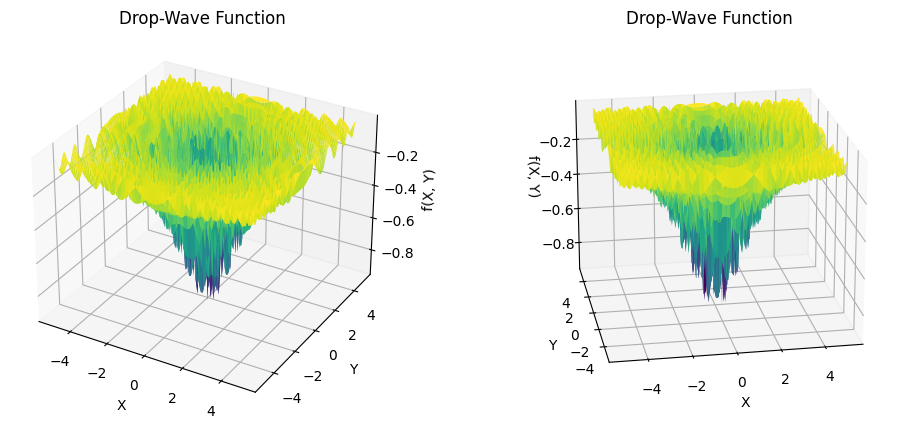

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Drop-Wave function
def drop_wave(x, y):
    numerator = 1 + np.cos(12 * np.sqrt(x**2 + y**2))
    denominator = 0.5 * (x**2 + y**2) + 2
    return -numerator / denominator

# Generate data for the x and y axes
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Calculate the values of the Drop-Wave function for each pair (x, y)
z = drop_wave(x, y)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})

# Subplot 1 with the recommended domain
ax1.plot_surface(x, y, z, cmap='viridis')
ax1.set_title('Drop-Wave Function')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(X, Y)')

# Subplot 2 with a portion of the domain for better visualization
ax2.plot_surface(x, y, z, cmap='viridis')
ax2.set_title('Drop-Wave Function')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('f(X, Y)')
ax2.view_init(elev=20, azim=260)

# Show the subplots
plt.show()


## Descente de gradient stochastique

La descente de gradient stochastique (SGD) est un algorithme d'optimisation utilisé pour minimiser une fonction coût, souvent dans le contexte de l'apprentissage automatique. Contrairement à la descente de gradient classique, la SGD effectue des mises à jour de paramètres en utilisant un seul exemple d'entraînement à la fois, ce qui accélère la convergence, surtout avec des ensembles de données volumineux. Chaque mise à jour est basée sur le gradient calculé pour un exemple spécifique, rendant le processus plus rapide mais plus bruité en raison de la variabilité inhérente aux exemples individuels. La SGD est souvent utilisée avec plusieurs itérations à travers l'ensemble d'entraînement (époches), en mélangeant les exemples pour éviter des trajectoires d'optimisation déterministes.

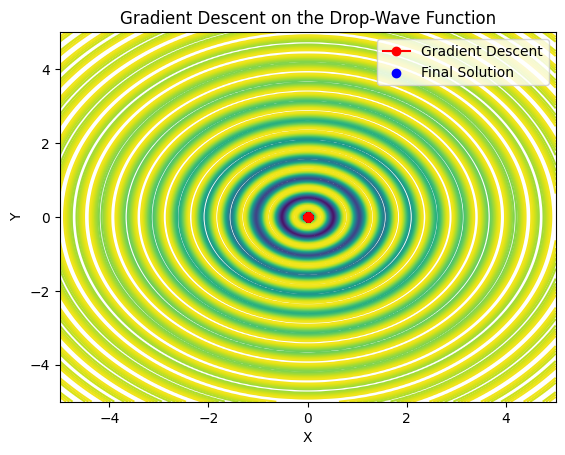

Final Solution: X = 1.256436062973728e-05 , Y = 1.256436062973728e-05
Objective function value at the final solution: -0.9999999885549211


In [42]:
import numpy as np
import matplotlib.pyplot as plt

def drop_wave(x, y):
    numerator = 1 + np.cos(12 * np.sqrt(x**2 + y**2))
    denominator = 0.5 * (x**2 + y**2) + 2
    return -numerator / denominator

def gradient(x, y):
    df_dx = (12 * x * np.sin(12 * np.sqrt(x**2 + y**2))) / (np.sqrt(x**2 + y**2) * (x**2 + y**2 + 4)**2) - (2 * x * (1 + np.cos(12 * np.sqrt(x**2 + y**2)))) / (x**2 + y**2 + 4)**2
    df_dy = (12 * y * np.sin(12 * np.sqrt(x**2 + y**2))) / (np.sqrt(x**2 + y**2) * (x**2 + y**2 + 4)**2) - (2 * y * (1 + np.cos(12 * np.sqrt(x**2 + y**2)))) / (x**2 + y**2 + 4)**2
    return np.array([df_dx, df_dy])

def gradient_descent(initial, learning_rate, iterations):
    path = [initial]

    for i in range(iterations):
        current_position = path[-1]
        grad = gradient(*current_position)
        new_position = current_position - learning_rate * grad
        path.append(new_position)
    return np.array(path)

# Parameters
initial_position = np.array([0.001, 0.001])
learning_rate = 0.0001
iterations = 5000

# Run Gradient Descent
path_gradient_descent = gradient_descent(initial_position, learning_rate, iterations)

# Plot results
x_range = np.linspace(-5, 5, 400)
y_range = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x_range, y_range)
Z = drop_wave(X, Y)

plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(path_gradient_descent[:, 0], path_gradient_descent[:, 1], marker='o', color='red', label='Gradient Descent')
plt.scatter(path_gradient_descent[-1, 0], path_gradient_descent[-1, 1], color='blue', label='Final Solution')
plt.title('Gradient Descent on the Drop-Wave Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Print the final solution
final_solution = path_gradient_descent[-1]
print("Final Solution: X =", final_solution[0], ", Y =", final_solution[1])
print("Objective function value at the final solution:", drop_wave(*final_solution))


## Recuit simulé

Le recuit simulé est une technique d'optimisation probabiliste utilisée pour résoudre des problèmes d'optimisation globale. Inspiré par le processus physique de refroidissement des métaux fondus, le recuit simulé introduit un élément de probabilité dans la recherche de solutions optimales. L'algorithme explore l'espace des solutions en acceptant des mouvements qui améliorent la fonction objectif ou qui sont acceptés avec une probabilité décroissante au fil du temps. Cela permet à l'algorithme de "sauter" hors des minima locaux et d'explorer plus largement l'espace de recherche. Les paramètres clés tels que la température initiale et le taux de refroidissement influent sur la dynamique du processus. Bien que le recuit simulé ne garantisse pas la convergence vers l'optimum global, il fournit une approche flexible et efficace pour traiter des problèmes d'optimisation difficiles, en particulier dans des contextes où l'espace de recherche est complexe et mal défini.

Best solution found: [0.05295963 0.51365273]
Objective function value at the best solution: -0.9357452672057144


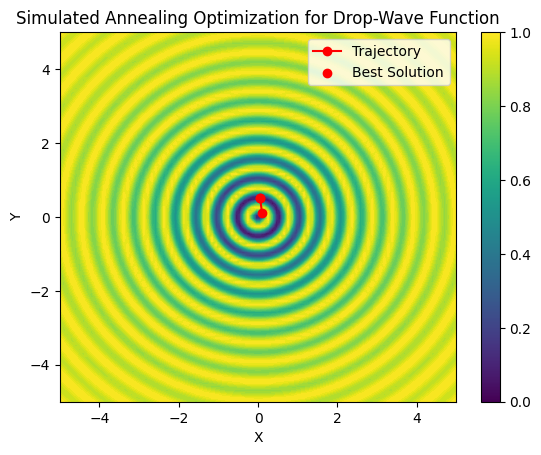

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Drop-Wave function
def drop_wave(x, y):
    numerator = 1 + np.cos(12 * np.sqrt(x**2 + y**2))
    denominator = 0.5 * (x**2 + y**2) + 2
    return -numerator / denominator

# Simulated Annealing algorithm
def simulated_annealing_drop_wave(initial_solution, temperature, cooling_rate, num_iterations):
    current_solution = np.array(initial_solution)
    best_solution = np.array(initial_solution)
    temperature_original = temperature

    for iteration in range(num_iterations):
        # Generate a new neighboring solution
        new_solution = current_solution + np.random.uniform(low=-0.1, high=0.1, size=2)

        # Calculate the cost difference between the new solution and the current one
        delta_cost = drop_wave(new_solution[0], new_solution[1]) - drop_wave(current_solution[0], current_solution[1])

        # Accept the new solution with a certain probability
        if delta_cost < 0 or np.random.rand() < np.exp(-delta_cost / temperature):
            current_solution = new_solution

        # Update the best solution
        if drop_wave(current_solution[0], current_solution[1]) < drop_wave(best_solution[0], best_solution[1]):
            best_solution = current_solution

        # Cool down the temperature
        temperature = temperature_original / (1 + cooling_rate * iteration)
    return best_solution

# Algorithm parameters
initial_solution = [0.1, 0.1]
initial_temperature = 10.0
cooling_rate = 0.005
iterations = 1000

# Apply the simulated annealing algorithm to the Drop-Wave function
best_solution_drop_wave = simulated_annealing_drop_wave(initial_solution, initial_temperature, cooling_rate, iterations)


# Print the result
print("Best solution found:", best_solution_drop_wave)
print("Objective function value at the best solution:", drop_wave(*best_solution_drop_wave))

# Visualize the function and the optimization trajectory
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = drop_wave(X, Y)

plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.plot([initial_solution[0], best_solution_drop_wave[0]], [initial_solution[1], best_solution_drop_wave[1]], marker='o', color='red', label='Trajectory')
plt.scatter(best_solution_drop_wave[0], best_solution_drop_wave[1], color='red', label='Best Solution')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simulated Annealing Optimization for Drop-Wave Function')
plt.legend()
plt.colorbar()
plt.show()


## Algorithme génétique

Les algorithmes génétiques (AG) sont des techniques d'optimisation inspirées par le processus de sélection naturelle et de génétique. Ils sont couramment utilisés pour résoudre des problèmes d'optimisation globale et de recherche heuristique. L'algorithme génétique opère en générant une population initiale de solutions potentielles, représentées sous forme de chromosomes. Ces solutions sont ensuite évaluées en fonction de leur aptitude, déterminée par une fonction objectif. Les individus les plus performants ont une probabilité plus élevée d'être sélectionnés pour la reproduction, où des opérations génétiques telles que le croisement et la mutation sont appliquées pour créer une nouvelle génération. Ce processus se répète sur plusieurs générations, favorisant la convergence vers des solutions de plus en plus performantes. Les AG sont particulièrement adaptés pour traiter des problèmes complexes et multidimensionnels, offrant une approche efficace pour explorer l'espace des solutions et trouver des solutions robustes dans des contextes où la topologie de la fonction objectif est non linéaire ou mal définie.

In [44]:
import random
from deap import base, creator, tools, algorithms

# Define the problem: Drop-Wave function
def drop_wave(individual):
    x, y = individual
    numerator = 1 + np.cos(12 * np.sqrt(x**2 + y**2))
    denominator = 0.5 * (x**2 + y**2) + 2
    return -numerator / denominator,

# Define the optimization problem (minimization)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Define the genetic algorithm parameters
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -5, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", drop_wave)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create an initial population of individuals
population = toolbox.population(n=50)

# Define the number of generations
generations = 50
# Run the genetic algorithm
algorithms.eaMuPlusLambda(population, toolbox, mu=50, lambda_=200, cxpb=0.7, mutpb=0.2, ngen=generations, stats=None, halloffame=None, verbose=True)
# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_fitness = drop_wave(best_individual)[0]

# Print the results
print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	175   
2  	179   
3  	169   
4  	175   
5  	185   
6  	187   
7  	179   
8  	178   
9  	182   
10 	181   
11 	185   
12 	182   
13 	177   
14 	185   
15 	185   
16 	179   
17 	178   
18 	182   
19 	183   
20 	188   
21 	185   
22 	176   
23 	179   
24 	187   
25 	178   
26 	179   
27 	181   
28 	176   
29 	187   
30 	186   
31 	176   
32 	180   
33 	180   
34 	184   
35 	185   
36 	179   
37 	183   
38 	181   
39 	183   
40 	166   
41 	184   
42 	179   
43 	176   
44 	173   
45 	179   
46 	184   
47 	182   
48 	173   
49 	181   
50 	186   
Best Individual: [-0.3632691214938616, -0.3723704744332432]
Best Fitness: -0.9362453278079416


## Optimisation Bayesienne

L'optimisation bayésienne est une technique puissante et efficace d'optimisation qui utilise des modèles probabilistes pour explorer des espaces de recherche complexes et identifier des solutions optimales. Elle est particulièrement utile dans des scénarios où la fonction objectif est coûteuse à évaluer, car elle équilibre de manière intelligente l'exploration et l'exploitation afin de minimiser le nombre d'évaluations nécessaires. L'optimisation bayésienne construit un modèle probabiliste de substitution, généralement un processus gaussien, pour capturer l'incertitude et la corrélation dans les données observées. Ce modèle guide la recherche en suggérant de nouveaux points dans l'espace des paramètres où la fonction objectif est susceptible d'avoir des valeurs plus faibles. À travers un processus itératif d'évaluation de la fonction objectif, de mise à jour du modèle de substitution et de raffinement de l'espace de recherche, l'optimisation bayésienne converge vers l'optimum global. Cette approche est largement appliquée dans divers domaines, notamment l'ajustement d'hyperparamètres pour l'apprentissage automatique, la conception expérimentale et l'optimisation basée sur des simulations, où l'objectif est de trouver efficacement des configurations optimales en présence de ressources limitées et d'évaluations bruitées.

In [45]:
from skopt import gp_minimize
from skopt.space import Real
import numpy as np

# Define the drop wave function
def drop_wave(individual):
    x, y = individual
    numerator = 1 + np.cos(12 * np.sqrt(x**2 + y**2))
    denominator = 0.5 * (x**2 + y**2) + 2
    return -numerator / denominator

# Define the optimization space
space = [Real(-5, 5, name='x'), Real(-5, 5, name='y')]
# Perform Bayesian Optimization
result = gp_minimize(drop_wave, space, n_calls=30, random_state=42)
# Get the best parameters and minimum value
best_params = result.x
min_value = result.fun

# Print the results
print("Number of iterations:", len(result.func_vals))
print("Best Parameters:", best_params)
print("Minimum Value:", min_value)



Number of iterations: 30
Best Parameters: [-0.03606919960659116, -0.5243491527156543]
Minimum Value: -0.9352672538160047


## Etude comparative

### Les paramètres utilisés :
* Descente de gradient stochastique : $X_0$=(0.001, 0.001), learning_rate = 0.0001, iterations = 5000
* Recuit simulé : $X_0$=(0.1, 0.1), initial_temperature = 10.0, cooling_rate = 0.005,  iterations = 1000
* algorithme génétique : $\mu =50,\lambda = 200,Cxpb=0.7, Mutpb=0.2,ngen=50 $
* Optimisation bayesienne : $n\_calls=30$


### Temps de convergence :


Les temps de convergence 1er essai pour les algorithmes sont les suivants:
* Descente de gradient stochastique : 0.17s
* Recuit simulé : 0.04s
* Algorithme génétique : 0.35s
* Optimisation bayesienne : 14.92s


Pour tracer le temps de convergence pour différents nombres d'itérations on utilise le code suivant :

Pour la descente de gradient stochastique :

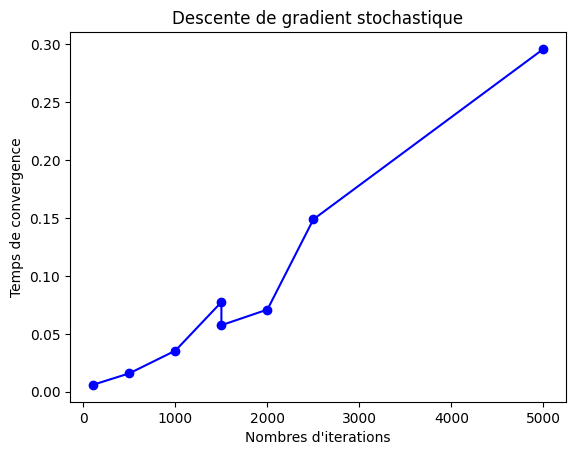

In [46]:
import matplotlib.pyplot as plt
L=[100,500,1000,1500,1500,2000,2500,5000]
T=[]
for i in range(len(L)):
  start_time=time.time()
  path_gradient_descent = gradient_descent(np.array([0.001, 0.001]), 0.0001, L[i])
  end_time=time.time()
  convergence_time=end_time-start_time
  T.append(convergence_time)

plt.plot(L, T, marker='o', linestyle='-', color='b')

plt.xlabel('Nombres d\'iterations')
plt.ylabel('Temps de convergence')
plt.title("Descente de gradient stochastique")
# Display the plot
plt.show()


Pour le recuit simulé

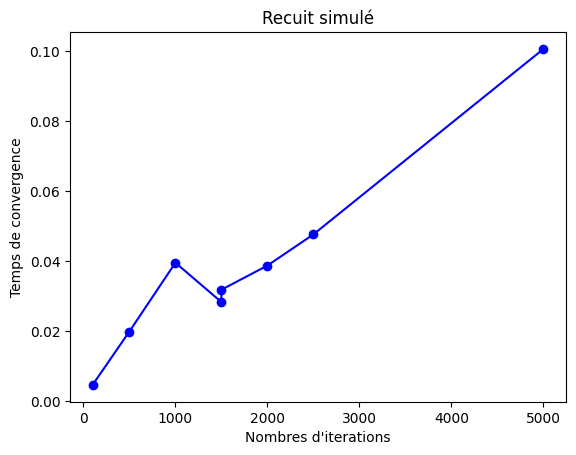

In [49]:
import matplotlib.pyplot as plt
L=[100,500,1000,1500,1500,2000,2500,5000]
T=[]
# Algorithm parameters
initial_solution = [0.1, 0.1]
initial_temperature = 10.0
cooling_rate = 0.005

for i in range(len(L)):
  start_time=time.time()
  best_solution_drop_wave = simulated_annealing_drop_wave(initial_solution, initial_temperature, cooling_rate, L[i])
  end_time=time.time()
  convergence_time=end_time-start_time
  T.append(convergence_time)

plt.plot(L, T, marker='o', linestyle='-', color='b')

plt.xlabel('Nombres d\'iterations')
plt.ylabel('Temps de convergence')
plt.title("Recuit simulé")
# Display the plot
plt.show()


Pour l'algorithme génétique :

gen	nevals
0  	0     
1  	181   
2  	172   
3  	186   
4  	181   
5  	179   
6  	180   
7  	178   
8  	172   
9  	185   
10 	182   
gen	nevals
0  	0     
1  	184   
2  	174   
3  	178   
4  	184   
5  	184   
6  	182   
7  	182   
8  	189   
9  	183   
10 	175   
11 	168   
12 	179   
13 	183   
14 	188   
15 	167   
gen	nevals
0  	0     
1  	177   
2  	172   
3  	174   
4  	183   
5  	175   
6  	180   
7  	178   
8  	179   
9  	179   
10 	176   
11 	180   
12 	183   
13 	181   
14 	170   
15 	181   
16 	181   
17 	173   
18 	187   
19 	175   
20 	176   
gen	nevals
0  	0     
1  	172   
2  	184   
3  	177   
4  	171   
5  	182   
6  	180   
7  	178   
8  	182   
9  	187   
10 	178   
11 	164   
12 	175   
13 	183   
14 	178   
15 	177   
16 	180   
17 	181   
18 	180   
19 	184   
20 	179   
21 	177   
22 	173   
23 	178   
24 	187   
25 	178   
gen	nevals
0  	0     
1  	175   
2  	180   
3  	173   
4  	179   
5  	181   
6  	184   
7  	184   
8  	181   
9  	181   
10 	177   
11 	183   

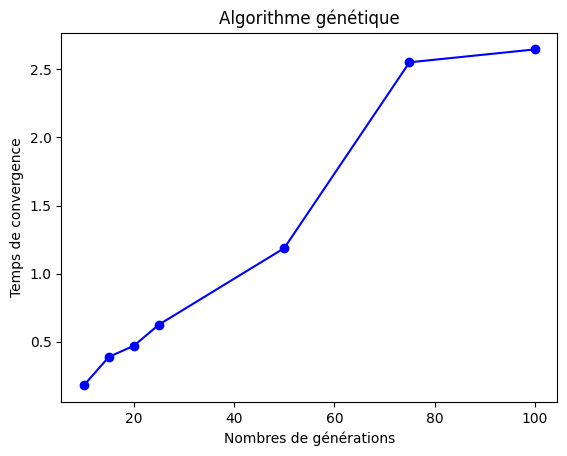

In [50]:
import matplotlib.pyplot as plt
L=[10,15,20,25,50,75,100]
T=[]
for i in range(len(L)):
  start_time=time.time()
  algorithms.eaMuPlusLambda(population, toolbox, mu=50, lambda_=200, cxpb=0.7, mutpb=0.2, ngen=L[i], stats=None, halloffame=None, verbose=True)
  end_time=time.time()
  convergence_time=end_time-start_time
  T.append(convergence_time)

plt.plot(L, T, marker='o', linestyle='-', color='b')

plt.xlabel('Nombres de générations')
plt.ylabel('Temps de convergence')
plt.title("Algorithme génétique")
# Display the plot
plt.show()